In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/attrition/Attrition.csv


In [2]:
!pip install -q hvplot

In [3]:
import hvplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import plotly.express as px
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import datetime as dt
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [4]:

df = pd.read_csv("/kaggle/input/attrition/Attrition.csv")
df.head()
#/kaggle/input/attrition/Attrition.csv

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
print(df.describe())

          Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                  

In [6]:
#Check the sum of null values
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
#Looks like our data is clean so to further explore the dataset i try to get ratio of female:male employee count & their age
gender_age = df.groupby('Gender').agg(
    count=('Gender', 'size'),
    average_age=('Age', 'mean')
).reset_index()
gender_age

,Gender,count,average_age
0,Female,588,37.33
1,Male,882,36.65


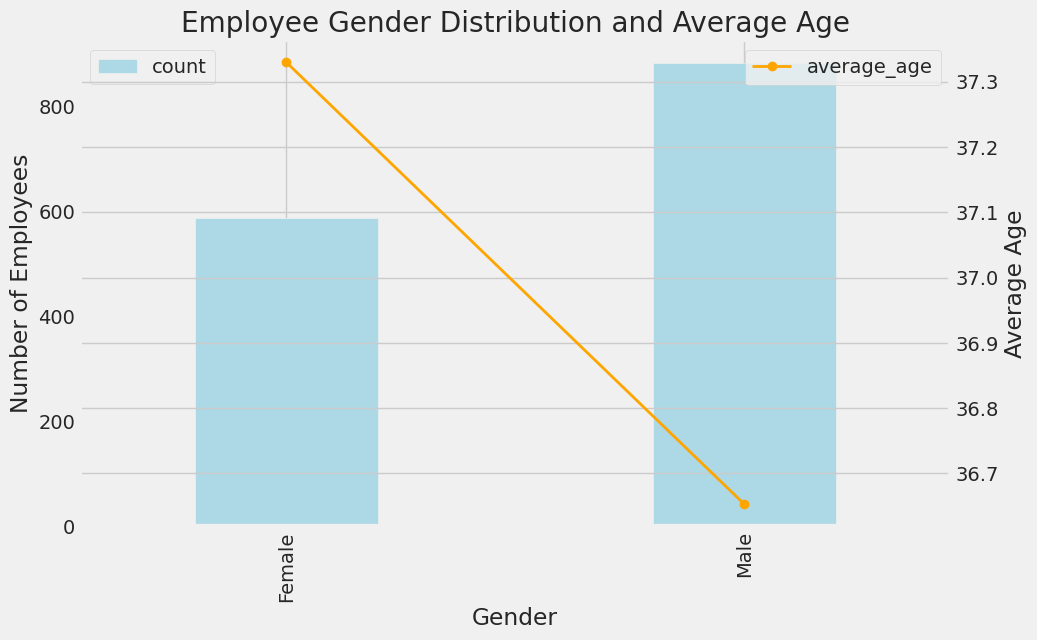

In [8]:
#Now lets plot the male:female ratio with their avarage age
import matplotlib.pyplot as plt

# Create a bar plot for counts
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for count of employees by gender
gender_age.plot(x='Gender', y='count', kind='bar', ax=ax1, color='lightblue', width=0.4)
ax1.set_ylabel('Number of Employees')
ax1.set_title('Employee Gender Distribution and Average Age')

# Create a second y-axis for average age
ax2 = ax1.twinx()
gender_age.plot(x='Gender', y='average_age', kind='line', marker='o', ax=ax2, color='orange', linewidth=2)
ax2.set_ylabel('Average Age')

# Show grid
ax1.grid(axis='y')

# Display the plot
plt.show()


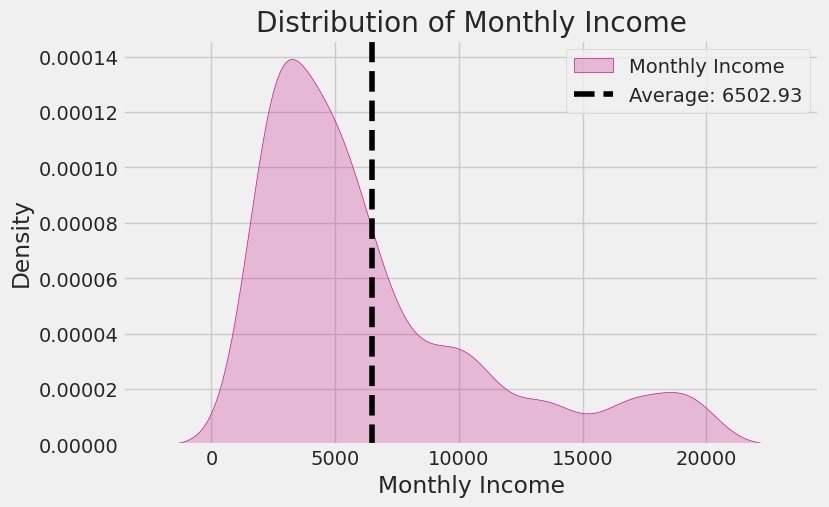

In [9]:
#Noe irresspective of gender lets check salary distribution across thee population
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()


In [10]:
#So the distribution is not the normal distribution & avarage income observed across population is 6503/-

In [11]:
#Lets check Attrition salary distribution by grnder

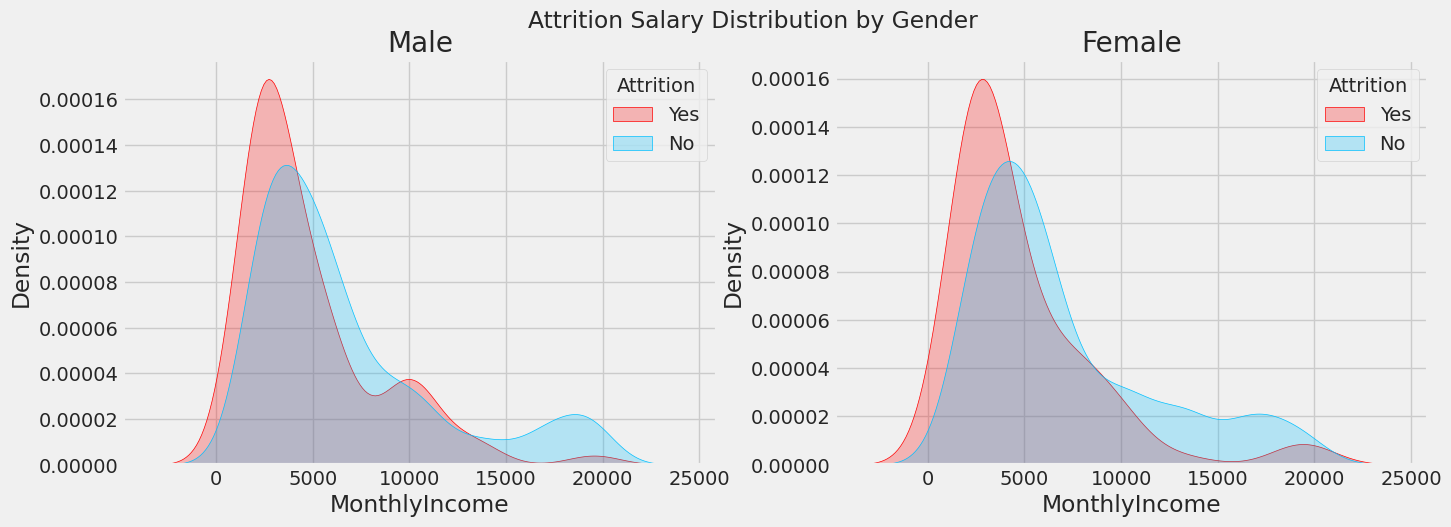

In [12]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Salary Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['MonthlyIncome'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['MonthlyIncome'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()




In [13]:
#looks like for both female & male lesser the monthly income higher the chance that empployee will leave the organization

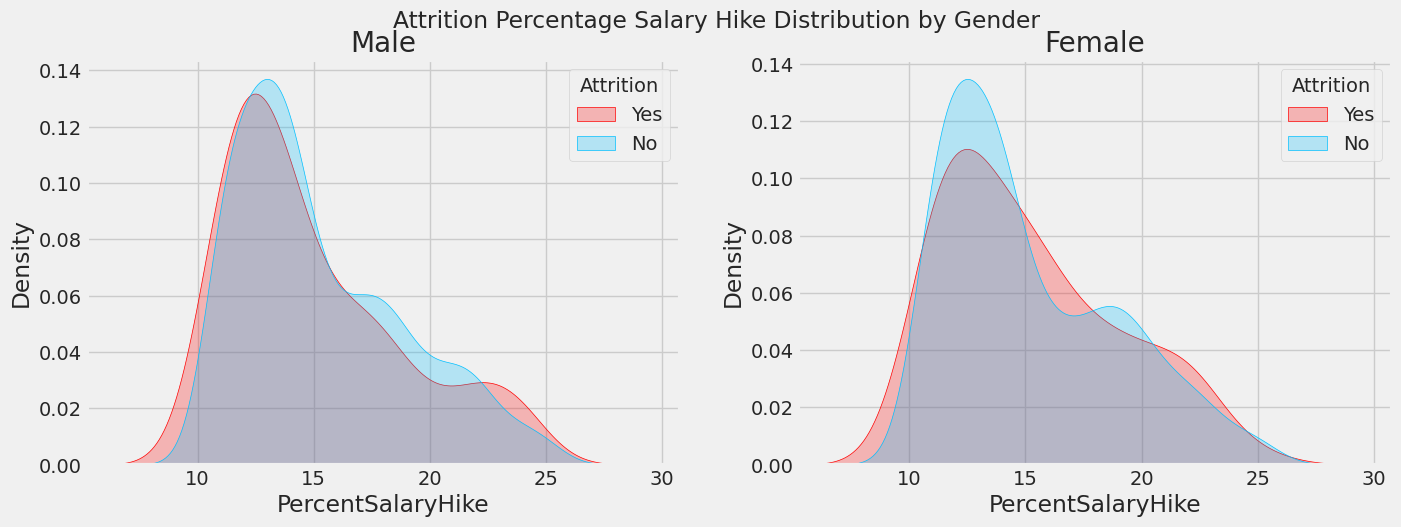

In [14]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Attrition Percentage Salary Hike Distribution by Gender')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[0],x=df[(df['Gender']=='Male')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#00BFFF', shade=True, label='No')
axes[0].set_title('Male')
axes[0].legend(title='Attrition')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='Yes')]['PercentSalaryHike'], color='r', shade=True, label='Yes')
sns.kdeplot(ax=axes[1],x=df[(df['Gender']=='Female')&(df['Attrition']=='No')]['PercentSalaryHike'], color='#00BFFF', shade=True, label='No')
axes[1].set_title('Female')
axes[1].legend(title='Attrition')
plt.show()

In [15]:
#lesser salery hike is directly related to employee attrition

In [16]:
#lets try to get which field sector/education section encounter attrition as per the dataset

unique_names_df = df['EducationField'].drop_duplicates()
print("Unique Names (DataFrame):\n", unique_names_df)

Unique Names (DataFrame):
 0         Life Sciences
2                 Other
4               Medical
27            Marketing
33     Technical Degree
100     Human Resources
Name: EducationField, dtype: object
